In [6]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
%matplotlib inline

In [40]:
# Loading data
data = pd.read_csv('./ex1/ex1data1.txt', header=None, names=['Population','Profit'])
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

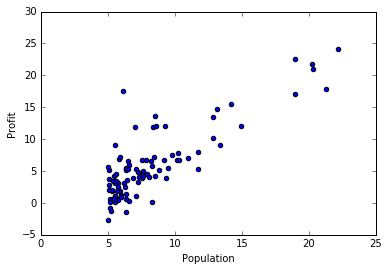

In [3]:
# quick plot to see what we're working with
data.plot(kind='scatter',x='Population',y='Profit')

In [12]:
# first create the cost function
def computeCost(X,y,theta):
    inner = np.power(X*theta.T-y, 2)
    return np.sum(inner)/(2*len(X))

In [22]:
# make some training data

# set X (training data) and y (target variable)
X = np.matrix(data[['Ones','Population']].values)
y = np.matrix(data[['Profit']].values)

# two parameters theta0 and theta1 (slope)
theta = np.matrix(np.array([0,0]))  
computeCost(X,y,theta)

32.072733877455676

In [23]:
# computing gradient descent
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost


In [25]:
gradientDescent(X,y,theta,.01, 1200)

(matrix([[-3.43962171,  1.14720751]]),
 array([ 6.73719046,  5.93159357,  5.90115471, ...,  4.49605217,
         4.49598345,  4.49591497]))

In [41]:
#Try the normal equation - not working at the moment...
X = np.matrix(data[['Ones','Population']].values)
y = np.matrix(data[['Profit']].values)

np.power((X.T * X),-1)*X.T*y

matrix([[ 13.84531777],
        [  1.51812466]])

In [30]:
# Let's use some tools!
solve = np.matrix(data[['Population','Profit']].values)
regression = linregress(solve)

In [34]:
print("intercept = ",regression.intercept)
print("slope     = ",regression.slope)

intercept =  -3.89578087831
slope     =  1.19303364419


In [46]:
x = np.array(X[:, 1].A1) 
z = regression.intercept+regression.slope*x

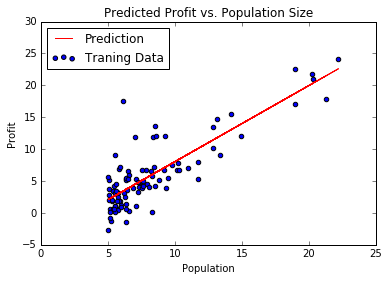

In [71]:
fig, ax = plt.subplots()  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  

In [92]:
from sklearn import linear_model
bad_model = linear_model.LinearRegression(fit_intercept=False,normalize=True)
bad_model.fit(X[:,1],y)

good_model = linear_model.LinearRegression(normalize='True')
good_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize='True')

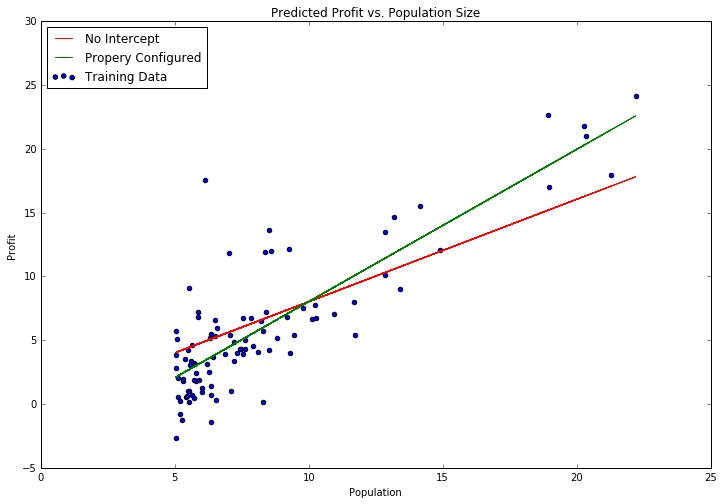

In [97]:
x = np.array(X[:, 1].A1)  
bad = bad_model.predict(X[:,1])
good = good_model.predict(X)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, bad, 'red', label='No Intercept')  
ax.plot(x, good, 'green', label='Propery Configured')  
ax.scatter(data.Population, data.Profit, label='Training Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  
